In [1]:
!pip install -q qiskit
!pip install -q qiskit_aer
!pip install -q pylatexenc
!pip install -q qiskit_ibm_runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 116.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 11.7 MB/s eta 0:00:00


Importing the necessary modules and libraries to create the teleportation circuit

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

**Teleportation Circuit**

Initially Alice has a state |Ψ> which is to be teleported to Bob by sending 2 classical bits.

We will create a Bell State using qubits one each from Alice(A)and Bob(B) and then Alice performs a bell measurement on Ψ and A. These 2 bits are sent to Bob.

If measured value of A is 1 then Bob performs a pauli X gate on B and then if measured value of Ψ is 1 he performs a pauli Z gate on B to get the initial state.

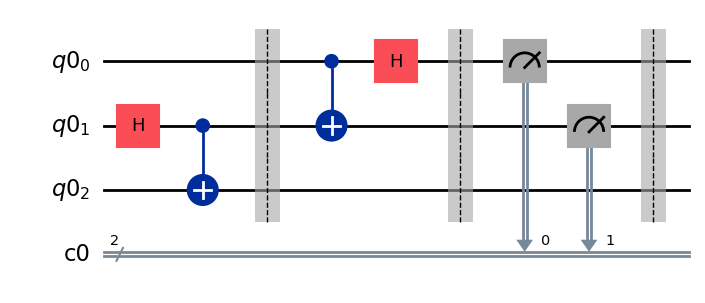

In [3]:
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)

#creating an entangled system of (A,B)
qc.h(1)
qc.cx(1,2)
qc.barrier() #to prevent reordering of gates

#Alice measuring the initial state and the entangled qubit in Bell basis
qc.cx(0,1)
qc.h(0)
qc.barrier()

qc.measure([0,1],[0,1])

#Correction done by Bob depending on the Bell measurement
if(cr[1] == 1):
  qc.x(2)
if(cr[1] == 1):
  qc.z(2)

qc.barrier()

qc.draw(output = 'mpl')

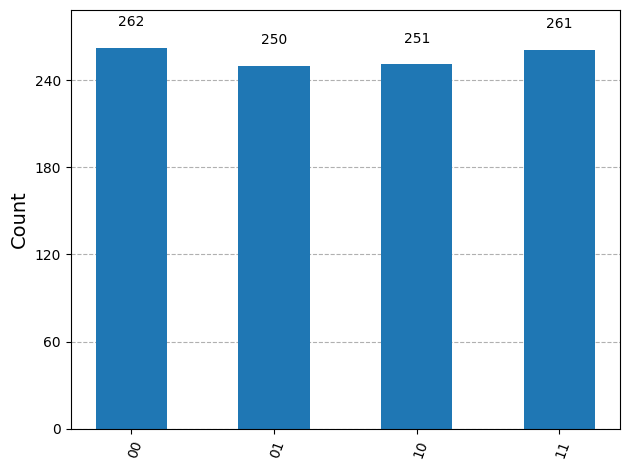

In [4]:
simulator = AerSimulator()
job = simulator.run(qc)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)
